# Assignment 3 - Eleanor Adachi

Our team's code can be found here: https://github.com/eleanor-adachi/ARE212_Materials

## 1. Exercises (GMM)

When we approach a new estimation problem from a GMM perspective there’s a simple set of steps we can follow.
- Describe the parameter space $B$;
- Describe a function $g_j(b)$ such that $\mathbb{E}g_j(\beta) = 0$;
- Describe an estimator for the covariance matrix $\mathbb{E}g_j(\beta)g_j(\beta)^⊤$.

In [1]:
# import GMM_class for later

import sys
 
# setting path
sys.path.append('../../')

from GMM_class_EA import GMM

### (1) Explain how the steps outlined above can be used to construct an optimally weighted GMM estimator.

The optimally weighted (efficient) GMM estimator is constructed as follows:

1. **Describe the Parameter Space $B$**: This step involves defining the set of parameters, denoted as $\beta$, that you want to estimate. The parameter space $B$ represents all possible values for the parameters of interest, i.e., $\beta \in B$.

2. **Describe a Function $g_j(\beta)$**: For each moment condition, represented by the function $g_j(\beta)$, you define a function that depends on the parameters of interest (denoted as $\beta$). The key aspect here is that the expected value of each moment condition should be equal to zero. Mathematically, it's represented as $\mathbb{E}g_j(\beta) = 0$, where $\beta$ represents the true parameter values.

3. **Describe an Estimator for the Covariance Matrix**: To construct an optimally weighted GMM estimator $b_{GMM}$, you need to estimate the covariance matrix of the moment conditions, $\Omega = \mathbb{E}g_j(\beta)g_j(\beta)^T$. In practice, since $\mathbb{E}g_j(b) \neq 0$ if the model is overidentified ($\ell > k$), then $\hat{\Omega} = \mathbb{E}g_j(b)g_j(b)^T - \mathbb{E}g_j(b)\mathbb{E}g_j(b)^T$

4. **Optimally Weighted GMM Estimator**: With the moment conditions and their covariance matrix defined, you can construct the GMM estimator. The GMM estimator is then calculated as:

$
b_N = \underset{b \in B}{\operatorname{argmin}} g_N(b)^T A g_N(b)
$

where $b$ represents the initial guess for the parameter vector, $A$ is the optimal weighting matrix such that $A = \Omega^{-1}$, and $g_j(b)$ are the moment conditions evaluated at the estimated parameters and $g_N(b) = \frac{1}{N} \sum_{j=1}^{N} g_j(b)$.

The goal is to find the weighting matrix $A$ that minimizes the variance of $b_N$. By choosing the weighting matrix optimally, the GMM estimator can achieve efficiency and robustness in estimating the parameters of interest. The weights are chosen such that more reliable moment conditions contribute more to the estimation process, leading to improved parameter estimates.

The asymptotic variance of the optimally weighted GMM estimator will be 

$$
V_b = \left(Q^\top\Omega^{-1}Q\right)^{-1}.
$$

where $Q = \mathbb{E}\frac{\partial g_j}{\partial b^\top}(b)$


### (2) Consider the following models. For each, provide a causal diagram; construct the optimally weighted GMM estimator of the unknown parameters (various Greek letters); and give an estimator for the covariance matrix of your estimates. If any additional assumptions are required for your estimator to be identified please provide these.

#### (a) $\mathbb{E}y = \mu; \mathbb{E}(y − \mu)^2 = \sigma^2; \mathbb{E}(y − \mu)^3 = 0$.  *Note: $y$ is a random variable.*

See https://math.stackexchange.com/questions/92648/calculation-of-the-n-th-central-moment-of-the-normal-distribution-mathcaln

See causal diagram below.

First, write the equations for $g_j$ and solve for $\hat{\Omega}$ and $Q$. Let $b$ represent a vector of parameter estimates, $(\hat{\mu}, \hat{\sigma}^2)$.

$$
g_j(\mu, \sigma^2) = \left( \begin{align}
    & y_j - \mu \\
    & (y_j - \mu)^2 - \sigma^2 \\
    & (y_j - \mu)^3
\end{align} \right)
$$

$$
\hat{\Omega} = \mathbb{E}g_j(b)g_j(b)^T - \mathbb{E}g_j(b)\mathbb{E}g_j(b)^T
$$ 

$$
Q
= \mathbb{E}\frac{\partial g_j}{\partial b^\top}(b)
= \begin{bmatrix}
-1 & 0 \\
\mathbb{E}(-2(y - \mu)) & -1 \\
\mathbb{E}(-3(y - \mu)^2) & -1 
\end{bmatrix} \\
= \begin{bmatrix}
-1 & 0 \\
0 & -1 \\
-3 \sigma^2 & -1 
\end{bmatrix}
$$

Plug into GMM estimator and asymptotic variance of GMM estimator:

$$
b = \underset{b \in B}{\operatorname{argmin}} g_N(b)^T \Omega^{-1} g_N(b) \\
V_b = \left(Q^\top\Omega^{-1}Q\right)^{-1}.
$$

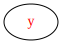

In [280]:
import graphviz as gr

g = gr.Digraph()
g.node('y', fontcolor='red')

g

#### (b) $y = \alpha + X \beta + u$; with $\mathbb{E}(X^T u) = \mathbb{E}u = 0$.  *Note: $y$, $X$, and $u$ are random variables.*

See causal diagram below.

First, write the equations for $g_j$ and solve for $\hat{\Omega}$ and $Q$. Let $b$ represent a vector of parameter estimates, $(\hat{\alpha}, \hat{\beta})$.

Assume that $u$ ~ $N[0, \Omega]$.

$$
g_j(\alpha, \beta) = \left( \begin{align}
    & y_j - \alpha - X_j \beta \\
    & X_j^T (y_j - \alpha - X_j \beta) \\
\end{align} \right)
$$

$$
\hat{\Omega} = \mathbb{E}g_j(b)g_j(b)^T - \mathbb{E}g_j(b)\mathbb{E}g_j(b)^T
$$ 

$$
Q
= \mathbb{E}\frac{\partial g_j}{\partial b^\top}(b)
= \begin{bmatrix}
-1 & -1 \\
-1 & -1
\end{bmatrix}
$$

Plug into GMM estimator and asymptotic variance of GMM estimator:

$$
b = \underset{b \in B}{\operatorname{argmin}} g_N(b)^T \Omega^{-1} g_N(b) \\
V_b = \left(Q^\top\Omega^{-1}Q\right)^{-1}.
$$

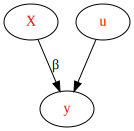

In [281]:
import graphviz as gr

g = gr.Digraph()
g.node('X', fontcolor='red')
g.node('u', fontcolor='red')
g.node('y', fontcolor='red')
g.edge('u', 'y')
g.edge('X', 'y', label='β')

g

#### (c) $y = \alpha + X \beta + u$; with $\mathbb{E}(X^T u) = \mathbb{E}u = 0$, and $\mathbb{E}(u^2) = \sigma^2$.  *Note: $y$, $X$, and $u$ are random variables.*

Same causal diagram as (b).

First, write the equations for $g_j$ and solve for $\hat{\Omega}$ and $Q$. Let $b$ represent a vector of parameter estimates, $(\hat{\alpha}, \hat{\beta})$.

$$
g_j(\alpha, \beta) = \left( \begin{align}
    & y_j - \alpha - X_j \beta \\
    & X_j^T (y_j - \alpha - X_j \beta) \\
    & (y_j - \alpha - X_j \beta)^2 - \sigma^2 \\
\end{align} \right)
$$

$$
\hat{\Omega} = \mathbb{E}g_j(b)g_j(b)^T - \mathbb{E}g_j(b)\mathbb{E}g_j(b)^T
$$ 

$$
Q
= \mathbb{E}\frac{\partial g_j}{\partial b^\top}(b)
= \begin{bmatrix}
-1 & -1 \\
-1 & -1 \\
2 \alpha - 2y_j + X_j \beta & 2 X_j^T X_j \beta -2 y_j X_j + 2 \alpha X_j
\end{bmatrix}
$$

Plug into GMM estimator and asymptotic variance of GMM estimator:

$$
b = \underset{b \in B}{\operatorname{argmin}} g_N(b)^T \Omega^{-1} g_N(b) \\
V_b = \left(Q^\top\Omega^{-1}Q\right)^{-1}.
$$

#### (d) $y = \alpha + X \beta + u$; with $\mathbb{E}(X^Tu) = \mathbb{E}u = 0$, and $\mathbb{E}(u^2) = e^{X \sigma}$.  *Note: $y$, $X$, and $u$ are random variables.*

See causal diagram below.

First, write the equations for $g_j$ and solve for $\hat{\Omega}$ and $Q$. Let $b$ represent a vector of parameter estimates, $(\hat{\alpha}, \hat{\beta})$.

$$
g_j(\alpha, \beta) = \left( \begin{align}
    & y_j - \alpha - X_j \beta \\
    & X_j^T (y_j - \alpha - X_j \beta) \\
    & (y_j - \alpha - X_j \beta)^2 - e^{X \sigma} \\
\end{align} \right)
$$

$$
\hat{\Omega} = \mathbb{E}g_j(b)g_j(b)^T - \mathbb{E}g_j(b)\mathbb{E}g_j(b)^T
$$ 

$$
Q
= \mathbb{E}\frac{\partial g_j}{\partial b^\top}(b)
$$

Plug into GMM estimator and asymptotic variance of GMM estimator:

$$
b = \underset{b \in B}{\operatorname{argmin}} g_N(b)^T \Omega^{-1} g_N(b) \\
V_b = \left(Q^\top\Omega^{-1}Q\right)^{-1}.
$$

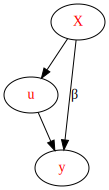

In [282]:
import graphviz as gr

g = gr.Digraph()
g.node('X', fontcolor='red')
g.node('u', fontcolor='red')
g.node('y', fontcolor='red')
g.edge('u', 'y')
g.edge('X', 'u')
g.edge('X', 'y', label='β')

g

#### (e) $y = \alpha + X \beta + u$; with $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ X = Q$.  *Note: $y$, $X$, $Z$, and $u$ are random variables.*

See causal diagram below.

Assume that $Q$ is a positive definite matrix.

First, write the equations for $g_j$ and solve for $\hat{\Omega}$ and $Q$. Let $b$ represent a vector of parameter estimates, $(\hat{\alpha}, \hat{\beta})$.

$$
g_j(\alpha, \beta) =  Z_j^T \left( y_j - \alpha - X_j \beta \right)
$$

Note that $g_j$ is $\ell \times 2$, where $\ell$ is the number of instruments in $Z$.

$$
\hat{\Omega} = \mathbb{E}g_j(b)g_j(b)^T - \mathbb{E}g_j(b)\mathbb{E}g_j(b)^T
$$ 

$$
Q
= \mathbb{E}\frac{\partial g_j}{\partial b^\top}(b)
$$

Plug into GMM estimator and asymptotic variance of GMM estimator:

$$
b = \underset{b \in B}{\operatorname{argmin}} g_N(b)^T \Omega^{-1} g_N(b) \\
V_b = \left(Q^\top\Omega^{-1}Q\right)^{-1}.
$$

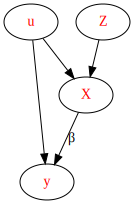

In [283]:
import graphviz as gr

g = gr.Digraph()
g.node('X', fontcolor='red')
g.node('Z', fontcolor='red')
g.node('u', fontcolor='red')
g.node('y', fontcolor='red')
g.edge('u', 'y')
g.edge('u', 'X')
g.edge('Z', 'X')
g.edge('X', 'y', label='β')

g

#### (f) $y = f(X \beta) + u$; with $f$ a known scalar function and with $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ X f'(X \beta) = Q(\beta)$. (Bonus question: where does this last restriction come from, and what role does it play?)  *Note: $y$, $X$, $Z$, and $u$ are random variables.*

In [284]:
# TODO: Where does this last restriction come from, and what role does it play???

# First order conditions??

See causal diagram below.

Assume that $Q$ is a positive definite matrix.

First, write the equations for $g_j$ and solve for $\hat{\Omega}$ and $Q$.

$$
g_j(\beta) =  Z_j^T \left( y_j - f(X_j \beta) \right)
$$

$$
\hat{\Omega} = \mathbb{E}g_j(b)g_j(b)^T - \mathbb{E}g_j(b)\mathbb{E}g_j(b)^T
$$ 

$$
Q
= \mathbb{E}\frac{\partial g_j}{\partial b^\top}(b)
$$

Plug into GMM estimator and asymptotic variance of GMM estimator:

$$
b = \underset{b \in B}{\operatorname{argmin}} g_N(b)^T \Omega^{-1} g_N(b) \\
V_b = \left(Q^\top\Omega^{-1}Q\right)^{-1}.
$$

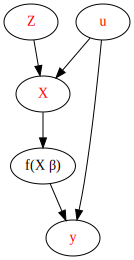

In [285]:
import graphviz as gr

g = gr.Digraph()
g.node('X', fontcolor='red')
g.node('Z', fontcolor='red')
g.node('f(X β)')
g.node('u', fontcolor='red')
g.node('y', fontcolor='red')
g.edge('X', 'f(X β)')
g.edge('u', 'y')
g.edge('u', 'X')
g.edge('Z', 'X')
g.edge('f(X β)', 'y')

g

#### (g) $y = f(X, \beta) + u$; with $f$ a known function and with $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ \frac{\partial f}{\partial \beta^T} (X, \beta) = Q(\beta)$.  *Note: $y$, $X$, $Z$, and $u$ are random variables.*

Same causal diagram as (f).

Assume that $Q$ is a positive definite matrix.

First, write the equations for $g_j$ and solve for $\hat{\Omega}$ and $Q$.

$$
g_j(\beta) =  Z_j^T \left( y_j - f(X_j, \beta) \right)
$$

$$
\hat{\Omega} = \mathbb{E}g_j(b)g_j(b)^T - \mathbb{E}g_j(b)\mathbb{E}g_j(b)^T
$$ 

$$
Q
= \mathbb{E}\frac{\partial g_j}{\partial b^\top}(b)
$$

Plug into GMM estimator and asymptotic variance of GMM estimator:

$$
b = \underset{b \in B}{\operatorname{argmin}} g_N(b)^T \Omega^{-1} g_N(b) \\
V_b = \left(Q^\top\Omega^{-1}Q\right)^{-1}.
$$

#### (h) $y^\gamma = \alpha + u$, with $y > 0$ and $\gamma$ a scalar, and $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ \begin{bmatrix} \gamma y^{\gamma − 1} \\ −1 \end{bmatrix} = Q(\gamma)$.  *Note: $y$, $Z$, and $u$ are random variables.*

See causal diagram below.

Assume that $Q$ is a positive definite matrix.

First, write the equations for $g_j$ and solve for $\hat{\Omega}$ and $Q$.

$$
g_j(\alpha) =  Z_j^T \left( y^\gamma - \alpha \right)
$$

$$
\hat{\Omega} = \mathbb{E}g_j(b)g_j(b)^T - \mathbb{E}g_j(b)\mathbb{E}g_j(b)^T
$$ 

$$
Q
= \mathbb{E}\frac{\partial g_j}{\partial b^\top}(b)
$$

Plug into GMM estimator and asymptotic variance of GMM estimator:

$$
b = \underset{b \in B}{\operatorname{argmin}} g_N(b)^T \Omega^{-1} g_N(b) \\
V_b = \left(Q^\top\Omega^{-1}Q\right)^{-1}.
$$

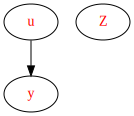

In [286]:
import graphviz as gr

g = gr.Digraph()
g.node('u', fontcolor='red')
g.node('Z', fontcolor='red')
g.node('y', fontcolor='red')
g.edge('u', 'y')

g

### (3) For each of the models above write a data-generating process in python. Your function `dgp` should take as arguments a sample size $N$ and a vector of "true" parameters `b0`, and return a dataset $(y, X)$.

#### (a) $\mathbb{E}y = \mu; \mathbb{E}(y − \mu)^2 = \sigma^2; \mathbb{E}(y − \mu)^3 = 0$.  *Note: $y$ is a random variable.*

In [287]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

def dgp_a(N, b0):
    '''
    Generate dataset for GMM model A
    
    Takes as inputs sample size N and vector of true parameters (mu and sigma), b0
    
    Returns a tuple with numpy array y, all of length N
    '''
    # Retrieve true parameters
    mu = b0[0]
    sigma = b0[1]

    # Construct u
    u = iid.norm(loc=mu, scale=sigma)
    
    # Construct y
    y = u.rvs(N)
    
    # Store in DataFrame
    df = pd.DataFrame(columns=['y'])
    df['y'] = y
    return df[['y']]

In [288]:
np.random.seed(1234)

y = dgp_a(100, [0, 1])

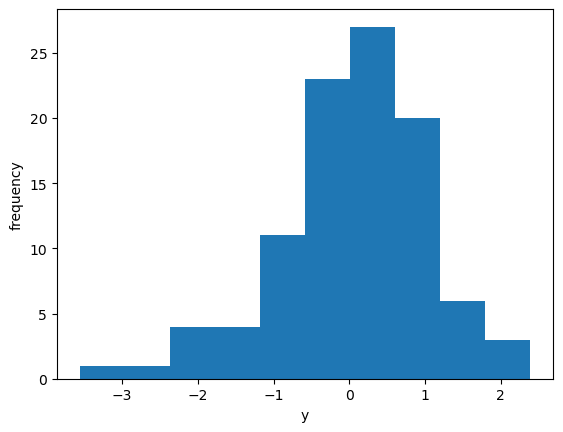

In [289]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.xlabel('y')
plt.ylabel('frequency')
plt.show()

#### (b) $y = \alpha + X \beta + u$; with $\mathbb{E}(X^T u) = \mathbb{E}u = 0$.  *Note: $y$, $X$, and $u$ are random variables.*

In [290]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

# Structural parameters;
mu = 0
sigma = 1

# Construct u
u = iid.norm(loc=mu, scale=sigma)

def dgp_b(N, b0):
    '''
    Generate dataset for GMM model B
    
    Takes as inputs sample size N and vector of true parameters (alpha and beta), b0
    
    Returns a tuple with numpy arrays y and X, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    beta = b0[1]
    
    # Construct X
    X = np.random.normal(size=N)
    
    # Construct y
    y = alpha + X*beta + u.rvs(N)
    
    # Store in DataFrame
    df = pd.DataFrame(columns=['y', 'X'])
    df['y'] = y
    df['X'] = X
    return df[['y']], df[['X']]

In [291]:
np.random.seed(1234)

alpha = 1
beta = 2
N = 100

y, X = dgp_b(N, [alpha, beta])

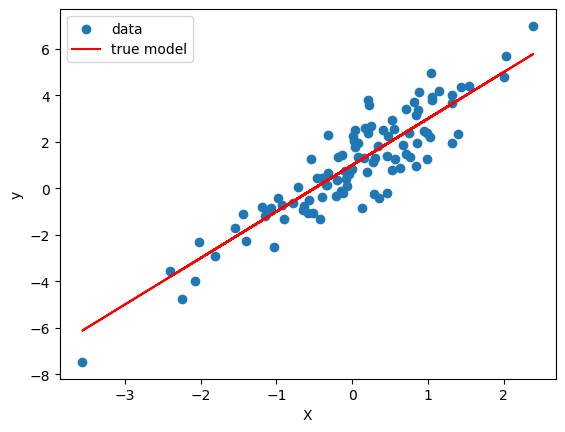

In [292]:
import matplotlib.pyplot as plt

y_true = alpha + X*beta

plt.scatter(X, y, label='data')
plt.plot(X, y_true, label='true model', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### (c) $y = \alpha + X \beta + u$; with $\mathbb{E}(X^T u) = \mathbb{E}u = 0$, and $\mathbb{E}(u^2) = \sigma^2$.  *Note: $y$, $X$, and $u$ are random variables.*

In [293]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

def dgp_c(N, b0):
    '''
    Generate dataset for GMM model C
    
    Takes as inputs sample size N and vector of true parameters (alpha, beta, and sigma), b0
    
    Returns a tuple with numpy arrays y and X, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    beta = b0[1]
    sigma = b0[2]

    # Construct u
    u = iid.norm(loc=0, scale=sigma)
    
    # Construct X
    X = np.random.normal(size=N)
    
    # Construct y
    y = alpha + X*beta + u.rvs(N)
    
    # Store in DataFrame
    df = pd.DataFrame(columns=['y', 'X'])
    df['y'] = y
    df['X'] = X
    return df[['y']], df[['X']]

In [294]:
np.random.seed(1234)

alpha = 1
beta = 2
sigma = 2
N = 100

y, X = dgp_c(N, [alpha, beta, sigma])

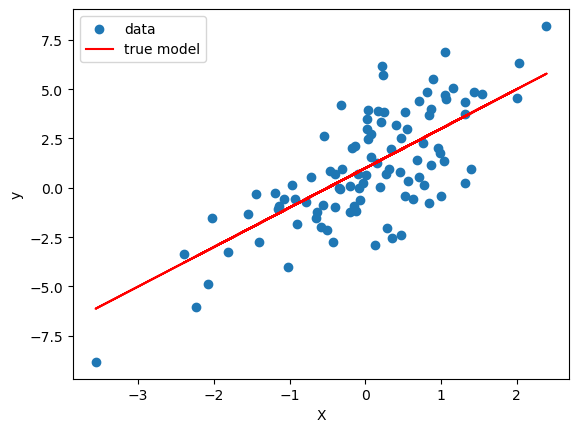

In [295]:
import matplotlib.pyplot as plt

y_true = alpha + X*beta

plt.scatter(X, y, label='data')
plt.plot(X, y_true, label='true model', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### (d) $y = \alpha + X \beta + u$; with $\mathbb{E}(X^Tu) = \mathbb{E}u = 0$, and $\mathbb{E}(u^2) = e^{X \sigma}$.  *Note: $y$, $X$, and $u$ are random variables.*

In [296]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

def dgp_d(N, b0, sigma=1):
    '''
    Generate dataset for GMM model D
    
    Takes as inputs sample size N and vector of true parameters (alpha and beta), b0
    
    Returns a tuple with numpy arrays y and X, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    beta = b0[1]

    # Construct X
    X = np.random.normal(size=N)
    
    # Construct u
    u = np.random.normal(size=N, loc=0, scale=np.sqrt(np.exp(X**sigma)))
    
    # Construct y
    y = alpha + X*beta + u
    
    # Construct df
    combined_dict = {'y':y, 'x':X, 'Constant':1}
    df = pd.DataFrame(combined_dict)
    
    return df['y'], df[['Constant','x']]

In [297]:
np.random.seed(1234)

alpha = 1
beta = 2
sigma = 1
N = 100

y, X = dgp_d(N, [alpha, beta, sigma])

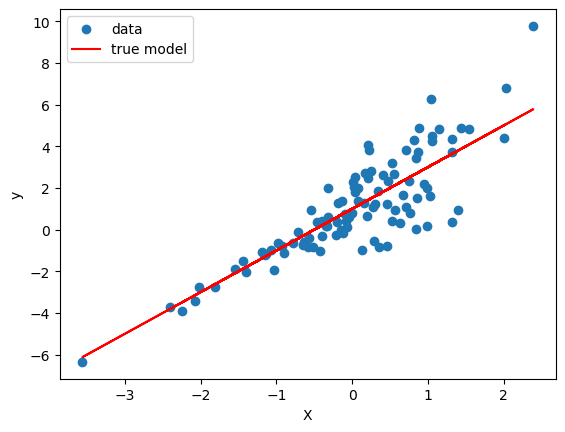

In [298]:
import matplotlib.pyplot as plt

y_true = X@[alpha, beta]

plt.scatter(X['x'], y, label='data')
plt.plot(X['x'], y_true, label='true model', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### (e) $y = \alpha + X \beta + u$; with $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ X = Q$.  *Note: $y$, $X$, $Z$, and $u$ are random variables.*

In [299]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

# def dgp_e(N, b0, pi=4, sigma_u=1, sigma_v=2):
#     '''
#     Generate dataset for GMM model E
    
#     Takes as inputs sample size N and vector of true parameters (alpha and beta), b0
    
#     Returns a tuple with numpy arrays y, X and Z, all of length N
#     '''
#     # Retrieve true parameters
#     alpha = b0[0]
#     beta = b0[1]
    
#     # Construct random variables
#     u = iid.norm(scale=sigma_u).rvs(N)
#     v = iid.norm(scale=sigma_v).rvs(N)
#     Z = iid.norm().rvs(N)
    
#     # Construct X and y
#     X = Z*pi + v
#     y = X*beta + u

#     df = pd.DataFrame({'y':y, 'x':X, 'z':Z, 'Constant':1})

#     return df[['y']], df[['Constant','x']], df[['Constant','z']]

# 2 instruments
def dgp_e(N, b0, pi=[3,4], sigma_u=2, sigma_v=3):
    '''
    Generate dataset for GMM model E
    
    Takes as inputs sample size N and vector of true parameters (alpha and beta), b0
    
    Returns a tuple with numpy arrays y, X and Z, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    beta = b0[1]
    
    # Construct random variables
    u = iid.norm(scale=sigma_u).rvs(N)
    v = iid.norm(scale=sigma_v).rvs(N)
    Z = iid.norm().rvs(size=(N,len(pi)))
    
    # Construct X and y
    X = Z@pi + v
    y = X*beta + u
    
#     # Option 1: Output as arrays
#     X = X.reshape(len(Z), 1)
#     y = y.reshape(len(Z), 1)
#     return y, X, Z
    
    # Option 2: Output as DataFrame
    # Construct z_cols and z_dict
    z_cols = []
    z_dict = {}
    for i in range(len(pi)):
        z_col = 'z'+str(i+1)
        z_cols.append(z_col)
        z_dict[z_col] = Z[:, i]
    
    # Construct df
    combined_dict = {'y':y, 'x':X, 'Constant':1}
    combined_dict.update(z_dict)
    df = pd.DataFrame(combined_dict)

#     return df[['y']], df[['Constant','x']], df[['Constant']+z_cols]
    return df['y'], df[['Constant','x']], df[['Constant']+z_cols] # y as series

In [300]:
np.random.seed(1234)

alpha = 1
beta = 2
N = 100

y, X, Z = dgp_e(N, [alpha, beta], pi=[3,4])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


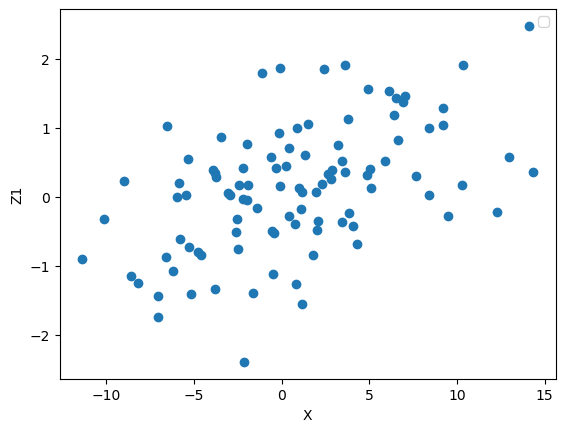

In [301]:
import matplotlib.pyplot as plt

# plt.scatter(X, Z[:, 0])
plt.scatter(X['x'], Z['z1'])
plt.xlabel('X')
plt.ylabel('Z1')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


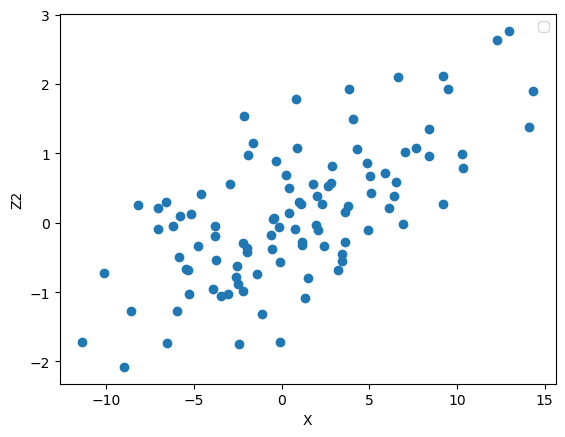

In [302]:
import matplotlib.pyplot as plt

# plt.scatter(X, Z[:, 1])
plt.scatter(X['x'], Z['z2'])
plt.xlabel('X')
plt.ylabel('Z2')
plt.legend()
plt.show()

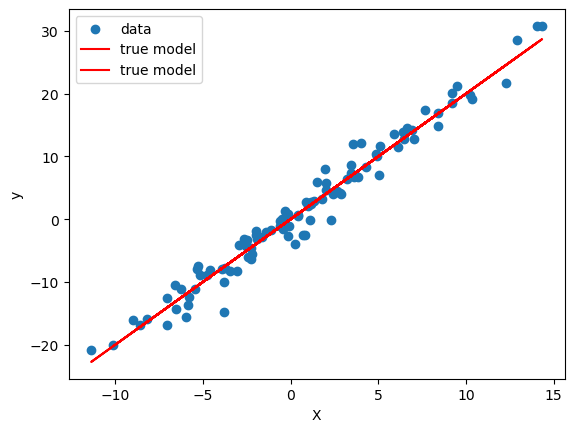

In [303]:
import matplotlib.pyplot as plt

y_true = X*beta

# plt.scatter(X, y, label='data')
plt.scatter(X['x'], y, label='data')
plt.plot(X, y_true, label='true model', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### (f) $y = f(X \beta) + u$; with $f$ a known scalar function and with $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ X f'(X \beta) = Q(\beta)$. *Note: $y$, $X$, $Z$, and $u$ are random variables.*

In [304]:
def dgp_f(N, b0, pi=[3,4], sigma_u=1, sigma_v=2):
    '''
    Generate dataset for GMM model F
    
    Takes as inputs sample size N and vector of true parameters (alpha and beta), b0
    
    Returns a tuple with numpy arrays y, X and Z, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    beta = b0[1]
    
    # Construct random variables
    u = iid.norm(scale=sigma_u).rvs(N)
    v = iid.norm(scale=sigma_v).rvs(N)
#     Z = iid.norm().rvs(size=(N,len(pi)))
    Z = np.random.normal(size=(N,len(pi)), loc=1, scale=0.5)
    
    # Construct X and y
    X = Z@pi + v
    y = alpha*np.exp(0.1*beta*X) + u
    
    # Construct z_cols and z_dict
    z_cols = []
    z_dict = {}
    for i in range(len(pi)):
        z_col = 'z'+str(i+1)
        z_cols.append(z_col)
        z_dict[z_col] = Z[:, i]
    
    # Construct df
    combined_dict = {'y':y, 'x':X, 'Constant':1}
    combined_dict.update(z_dict)
    df = pd.DataFrame(combined_dict)

    return df['y'], df[['Constant','x']], df[['Constant']+z_cols] # y as series

In [305]:
np.random.seed(1234)

alpha = 1
beta = 2
N = 100

y, X, Z = dgp_f(N, [alpha, beta], pi=[3,4])

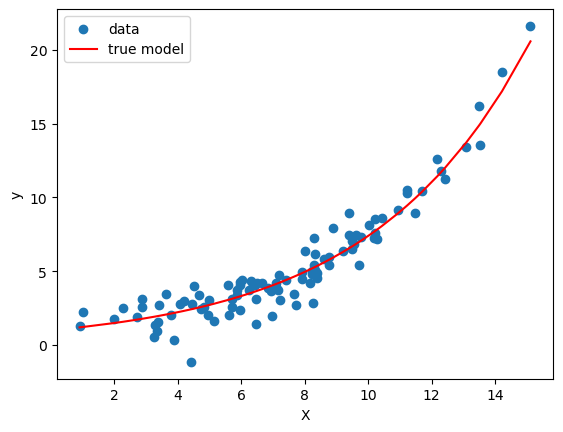

In [306]:
import matplotlib.pyplot as plt

y_true = alpha*np.exp(0.1*beta*X['x'])
true_xy = pd.DataFrame(columns=['x', 'y'])
true_xy['x'] = X['x']
true_xy['y'] = y_true
true_xy = true_xy.sort_values('x')

plt.scatter(X['x'], y, label='data')
plt.plot(true_xy['x'], true_xy['y'], label='true model', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### (g) $y = f(X, \beta) + u$; with $f$ a known function and with $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ \frac{\partial f}{\partial \beta^T} (X, \beta) = Q(\beta)$.  *Note: $y$, $X$, $Z$, and $u$ are random variables.*

Let $f(X) = \alpha + \beta x_1 + \gamma x_2^2$

In [307]:
def dgp_g(N, b0, pi=[1,2,3,4], sigma_u=1, sigma_v=2):
    '''
    Generate dataset for GMM model G
    
    Takes as inputs sample size N and vector of true parameters (alpha, beta, and gamma), b0
    
    Returns a tuple with numpy arrays y, X and Z, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    beta = b0[1]
    gamma = b0[2]
    
    # Construct random variables
    u = iid.norm(scale=sigma_u).rvs(N)
    v = iid.norm(scale=sigma_v).rvs(N)
    Z = np.random.normal(size=(N,len(pi)), loc=1, scale=0.5)
    
    # Construct X
    X1 = 5 + v
    X2 = Z@pi + v
    Xdf = pd.DataFrame()
    Xdf['Constant'] = np.ones(N)
    Xdf['x1'] = X1
    Xdf['x2'] = X2

    # Create df and add y
    df = Xdf.copy()
    y = alpha + beta*X1 + gamma*X2**2 + u
    df['y'] = y
    
    # Add Z to df
    z_cols = []
    for i in range(len(pi)):
        z_col = 'z'+str(i+1)
        z_cols.append(z_col)
        df[z_col] = Z[:, i]

    return df['y'], Xdf, df[['Constant']+z_cols] # y as series

In [308]:
np.random.seed(1234)

alpha = 1
beta = 2
gamma = 0.5
N = 100

y, X, Z = dgp_g(N, [alpha, beta, gamma], pi=[1,2,3,4])

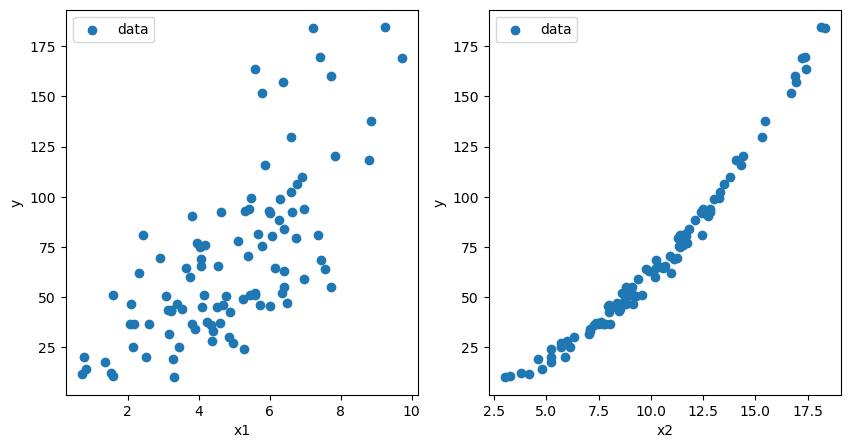

In [309]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.scatter(X['x1'], y, label='data')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax1.legend()

ax2.scatter(X['x2'], y, label='data')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')
ax2.legend()

plt.show()

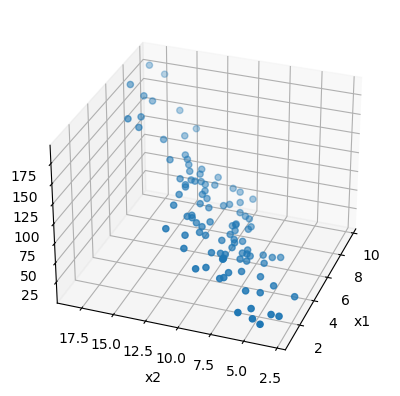

In [310]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['x1'], X['x2'], y)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# ax.view_init(10, 250)
ax.view_init(30, 200)

plt.show()

#### (h) $y^\gamma = \alpha + u$, with $y > 0$ and $\gamma$ a scalar, and $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ \begin{bmatrix} \gamma y^{\gamma − 1} \\ −1 \end{bmatrix} = Q(\gamma)$.  *Note: $y$, $Z$, and $u$ are random variables.*

In [311]:
def dgp_h(N, b0, pi=[3,4], sigma_u=1):
    '''
    Generate dataset for GMM model G
    
    Takes as inputs sample size N and vector of true parameters (alpha and gamma), b0
    
    Returns a tuple with numpy arrays y and Z, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    gamma = b0[1]
    
    # Construct random variables
    u = iid.norm(scale=sigma_u).rvs(N)
    Z = np.random.normal(size=(N,len(pi)), loc=1, scale=0.5)

    # Create df and add y
    df = pd.DataFrame()
    y = (alpha + u)**(1/gamma)
    df['y'] = y
    df['Constant'] = 1
    
    # Add Z to df
    z_cols = []
    for i in range(len(pi)):
        z_col = 'z'+str(i+1)
        z_cols.append(z_col)
        df[z_col] = Z[:, i]

    return df['y'], df[['Constant']+z_cols] # y as series

In [312]:
np.random.seed(1234)

alpha = 1
gamma = 0.5
N = 100

y, Z = dgp_h(N, [alpha, gamma], pi=[3,4])

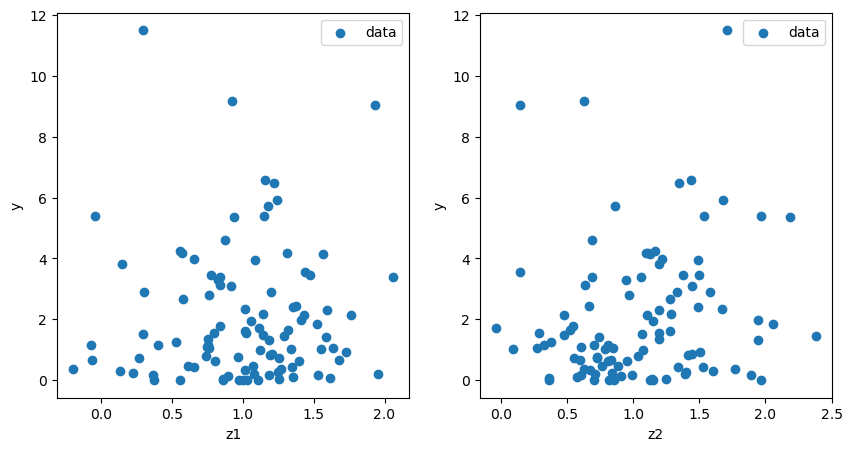

In [313]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.scatter(Z['z1'], y, label='data')
ax1.set_xlabel('z1')
ax1.set_ylabel('y')
ax1.legend()

ax2.scatter(Z['z2'], y, label='data')
ax2.set_xlabel('z2')
ax2.set_ylabel('y')
ax2.legend()

plt.show()

### (4) Select the most interesting of the data generating processes you developed, and using the code in `gmm.py` or `GMM_class.py` (see https://github.com/ligonteaching/ARE212_Materials/) use data from your `dgp` to analyze the finite sample performance of the corresponding GMM estimator you’ve constructed. Of particular interest is the distribution of your estimator using a sample size $N$ and how this distribution compares with the limiting distribution as $N \to \infty$.

In [314]:
import numpy as np
from numpy.linalg import inv
from scipy.optimize import minimize_scalar

def gj(b,y,X,Z):
    """Observations of g_j(b).

    This defines the deviations from the predictions of our model; i.e.,
    e_j = Z_ju_j, where EZ_ju_j=0.

    Can replace this function to testimate a different model.
    """
    return Z*(y - X*b)

def gN(b,data):
    """Averages of g_j(b).

    This is generic for data, to be passed to gj.
    """
    e = gj(b,*data) # is this actually a residual? Why do we call it e instead of gj?

    # Check to see more obs. than moments.
    assert e.shape[0] > e.shape[1], "Need more observations than moments!"
    
    return e.mean(axis=0)

def Omegahat(b,data):
    """Calculate estimate of Omega, inverse of weighting matrix"""
    
    e = gj(b,*data)

    # IMPORTANT: Recenter! We have Eu=0 under null.
    # Important to use this information.
    e = e - e.mean(axis=0) 
    
    # TODO: Where does 1/N come from?
    return e.T@e/e.shape[0] # Omega = (u u^T)/N??

def J(b,W,data):
    """Define GMM criterion function"""

    m = gN(b,data) # Sample moments @ b
    N = data[0].shape[0]

    return (N*m.T@W@m) # Scale by sample size

def two_step_gmm(data):

    # First step uses identity weighting matrix
    # data is a tuple
    W1 = np.eye(gj(1,*data).shape[1]) # *tuple means treat elements of this iterable as positional arguments

    # b1 is value of b that minimizes J given initial estimate of weighting matrix
    b1 = minimize_scalar(lambda b: J(b,W1,data)).x # minimize_scalar().x returns value that minimizes this function
    # remember that b1 is consistent

    # Construct 2nd step weighting matrix using
    # first step estimate of beta
    W2 = inv(Omegahat(b1,data))

    return minimize_scalar(lambda b: J(b,W2,data))

In [315]:
# using pre-built methods
def linear_iv(b,data):
    """
    Return matrix Z.T*e (ell x N)
    """
    y,X,Z=data
    e = y - X@b
    
    return (Z.T*e).T

# define true parameters
alpha = 1
beta = 2

# generate data
y,X,Z = dgp_e(N, [alpha, beta], pi=[3,4])

# create GMM estimator
est = GMM(linear_iv, (y,X,Z), 2)

# run GMM estimator
b, fun = est.two_step_gmm()

print(b)

print(fun)

[0.20951407 2.06501508]
0.0598679685047115


In [316]:
est.Omegahat(b)

,Constant,z1,z2
Constant,3.537147,0.182723,0.836641
z1,0.182723,3.385555,-0.663815
z2,0.836641,-0.663815,3.255536


In [317]:
# N = 1000 # Sample size

# D = 1000 # Monte Carlo draws

# b_draws_1000 = []
# J_draws_1000 = []

# # true parameters
# alpha = 1
# beta = 2

# for d in range(D):
#     soltn = two_step_gmm(dgp_e(N, [alpha, beta], pi=[3,4]))
#     b_draws_1000.append(soltn.x)
#     J_draws_1000.append(soltn.fun)

# using pre-built methods

N = 1000 # Sample size

D = 1000 # Monte Carlo draws

b_draws_1000 = pd.DataFrame(columns=['b0', 'b1'])
J_draws_1000 = []

# true parameters
alpha = 1
beta = 2

for d in range(D):
    est = GMM(linear_iv, dgp_e(N, [alpha, beta], pi=[3,4]), 2)
    b, fun = est.two_step_gmm()
    b_df = pd.DataFrame(b, index=b_draws_1000.columns).T
    b_draws_1000 = pd.concat([b_draws_1000, b_df], ignore_index=True)
    J_draws_1000.append(fun)

C:\Users\elean\AppData\Local\Temp\ipykernel_27376\3384837246.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b_draws_1000 = pd.concat([b_draws_1000, b_df], ignore_index=True)


In [318]:
# What if reduce sample size?
N = 100

b_draws_100 = []
J_draws_100 = []

# for d in range(D):
#     soltn = two_step_gmm(dgp_e(N, [alpha, beta], pi=[3,4]))
#     b_draws_100.append(soltn.x)
#     J_draws_100.append(soltn.fun)

b_draws_100 = pd.DataFrame(columns=['b0', 'b1'])
J_draws_100 = []
for d in range(D):
    est = GMM(linear_iv, dgp_e(N, [alpha, beta], pi=[3,4]), 2)
    b, fun = est.two_step_gmm()
    b_df = pd.DataFrame(b, index=b_draws_100.columns).T
    b_draws_100 = pd.concat([b_draws_100, b_df], ignore_index=True)
    J_draws_100.append(fun)

C:\Users\elean\AppData\Local\Temp\ipykernel_27376\2731854756.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b_draws_100 = pd.concat([b_draws_100, b_df], ignore_index=True)


In [319]:
# What if increase sample size?
N = 10000

# b_draws_10000 = []
# J_draws_10000 = []
# for d in range(D):
#     soltn = two_step_gmm(dgp_e(N, [alpha, beta], pi=[3,4]))
#     b_draws_10000.append(soltn.x)
#     J_draws_10000.append(soltn.fun)

b_draws_10000 = pd.DataFrame(columns=['b0', 'b1'])
J_draws_10000 = []
for d in range(D):
    est = GMM(linear_iv, dgp_e(N, [alpha, beta], pi=[3,4]), 2)
    b, fun = est.two_step_gmm()
    b_df = pd.DataFrame(b, index=b_draws_10000.columns).T
    b_draws_10000 = pd.concat([b_draws_10000, b_df], ignore_index=True)
    J_draws_10000.append(fun)

C:\Users\elean\AppData\Local\Temp\ipykernel_27376\2476054520.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b_draws_10000 = pd.concat([b_draws_10000, b_df], ignore_index=True)


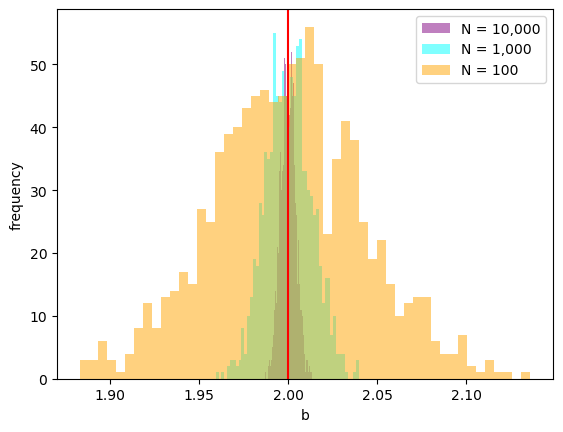

In [320]:
import matplotlib.pyplot as plt

# _ = plt.hist(b_draws_10000, bins=50, color='purple', alpha=0.5, label='N = 10,000')
# _ = plt.hist(b_draws_1000, bins=50, color='cyan', alpha=0.5, label='N = 1,000')
# _ = plt.hist(b_draws_100, bins=50, color='orange', alpha=0.5, label='N = 100')
_ = plt.hist(b_draws_10000['b1'], bins=50, color='purple', alpha=0.5, label='N = 10,000')
_ = plt.hist(b_draws_1000['b1'], bins=50, color='cyan', alpha=0.5, label='N = 1,000')
_ = plt.hist(b_draws_100['b1'], bins=50, color='orange', alpha=0.5, label='N = 100')
_ = plt.xlabel('b')
_ = plt.ylabel('frequency')
_ = plt.legend()
_ = plt.axvline(beta, color='r')

In [321]:
est.Omegahat(b)

,Constant,z1,z2
Constant,3.924100,-0.035878,0.089752
z1,-0.035878,3.914764,-0.051243
z2,0.089752,-0.051243,3.928125


In [322]:
# Q = Z.T@X
# Winv = Omegahat(beta,(y,X,Z))
Q = np.array(Z.T@X)
Winv = est.Omegahat(b)

In [323]:
# Limiting distribution of criterion (under null)
limiting_J = iid.chi2(2-1)

# Limiting SE of b
# note, avar is embedded: avar(b) = inv(Q.T@inv(Winv)@Q)
sigma_0 = lambda N: np.sqrt(inv(Q.T@inv(Winv)@Q)/N)[0][0] 

# Limiting distribution of estimator
limiting_b = iid.norm(loc=beta,scale=sigma_0(N)) # from central limit theorem

print("Monte Carlo standard errors (N = 10000): %g" % np.std(b_draws_10000['b1']))
print("Asymptotic approximation: %g" % sigma_0(N)) # asymptotic distribution is doing a "good job" capturing the variance of our estimator
print("Critical value for J statistic: %g (5%%)" % limiting_J.isf(.05))

Monte Carlo standard errors (N = 10000): 0.00414828
Asymptotic approximation: 0.000197577
Critical value for J statistic: 3.84146 (5%)


C:\Users\elean\AppData\Local\Temp\ipykernel_27376\378196487.py:6: RuntimeWarning: invalid value encountered in sqrt
  sigma_0 = lambda N: np.sqrt(inv(Q.T@inv(Winv)@Q)/N)[0][0]


0.948


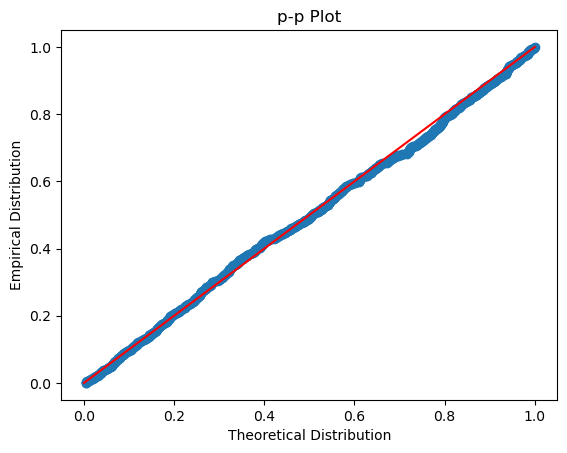

In [324]:
import matplotlib.pyplot as plt

def ppplot(data,dist):
    data = np.array(data)

    # Theoretical CDF, evaluated at points of data
    P = [dist.cdf(x) for x in data.tolist()]

    # Empirical CDF, evaluated at points of data
    Phat = [(data<x).mean() for x in data.tolist()]

    fig, ax = plt.subplots()
    
    ax.scatter(P,Phat)
    ax.plot([0,1],[0,1],color='r') # Plot 45
    ax.set_xlabel('Theoretical Distribution')
    ax.set_ylabel('Empirical Distribution')
    ax.set_title('p-p Plot')

    return ax
    
_ = ppplot(J_draws_100, limiting_J)
print(np.mean(np.array(J_draws_100) < limiting_J.isf(.05)))

C:\Users\elean\AppData\Local\Temp\ipykernel_27376\378196487.py:6: RuntimeWarning: invalid value encountered in sqrt
  sigma_0 = lambda N: np.sqrt(inv(Q.T@inv(Winv)@Q)/N)[0][0]


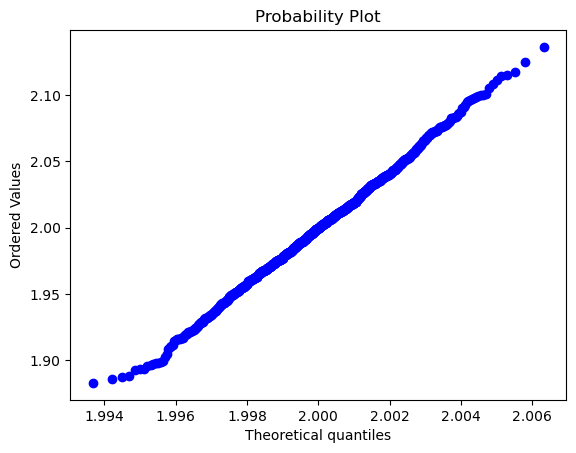

In [325]:
from scipy.stats import probplot

limiting_b = iid.norm(loc=beta, scale=sigma_0(100)) # from central limit theorem
_ = probplot(b_draws_100['b1'], dist=limiting_b, fit=False, plot=plt) # looking for 45 degree line

0.953


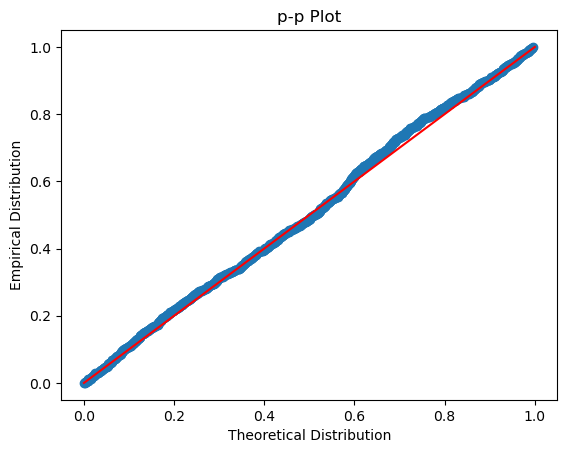

In [326]:
_ = ppplot(J_draws_1000, limiting_J)
print(np.mean(np.array(J_draws_1000) < limiting_J.isf(.05)))

C:\Users\elean\AppData\Local\Temp\ipykernel_27376\378196487.py:6: RuntimeWarning: invalid value encountered in sqrt
  sigma_0 = lambda N: np.sqrt(inv(Q.T@inv(Winv)@Q)/N)[0][0]


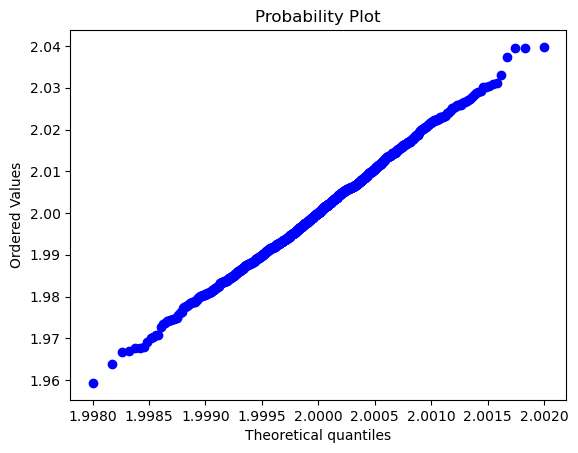

In [327]:
from scipy.stats import probplot

limiting_b = iid.norm(loc=beta, scale=sigma_0(1000)) # from central limit theorem
_ = probplot(b_draws_1000['b1'], dist=limiting_b, fit=False, plot=plt) # looking for 45 degree line

0.951


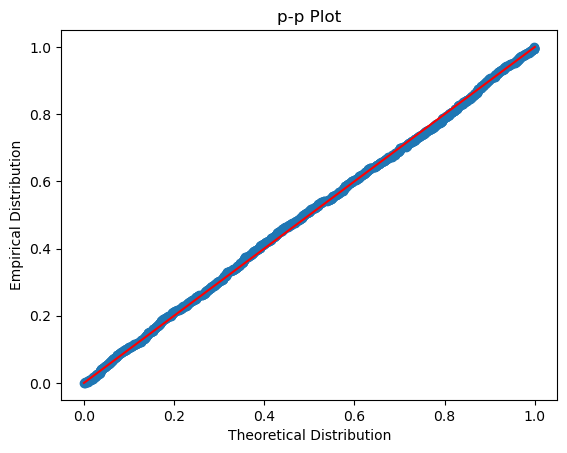

In [328]:
_ = ppplot(J_draws_10000, limiting_J)
print(np.mean(np.array(J_draws_10000) < limiting_J.isf(.05)))

C:\Users\elean\AppData\Local\Temp\ipykernel_27376\378196487.py:6: RuntimeWarning: invalid value encountered in sqrt
  sigma_0 = lambda N: np.sqrt(inv(Q.T@inv(Winv)@Q)/N)[0][0]


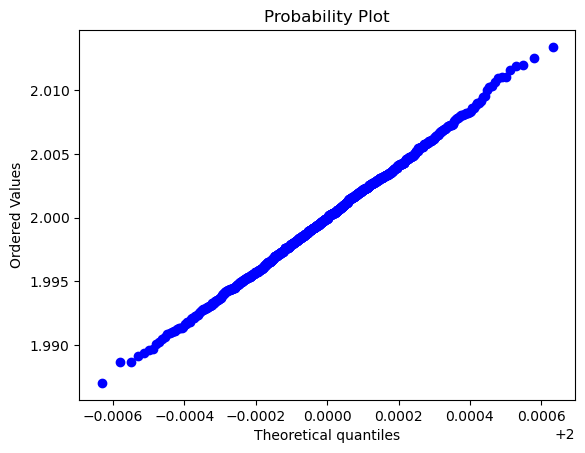

In [329]:
from scipy.stats import probplot

limiting_b = iid.norm(loc=beta, scale=sigma_0(10000)) # from central limit theorem
_ = probplot(b_draws_10000['b1'], dist=limiting_b, fit=False, plot=plt) # looking for 45 degree line

## 2. Exercises (Cross-Validation)

Consider estimation of a linear model $y = X \beta + u$, with the identifying
assumption that $\mathbb{E}(u|X) = 0$.

When we compute K-fold cross-validation of a tuning parameter $\lambda$ (e.g., the penalty parameter in a LASSO regression), then for each value of $\lambda$ we obtain $K$ estimates of any given parameter, say $\beta_i$; denote the estimates of this parameter by $b_i^. = (b_i^1 , . . . , b_i^K)$. If our total sample (say $D_1$) comprises $N$ iid observations, then each of our $K$ estimates will be based on a sample $D_1^k$ of roughly $N \frac{K−1}{K}$ observations.

### (1) How can you use the estimates $b_i^.$ to estimate the variance of the estimator?

### (2) What can you say about the variance of your estimator of the variance? In particular, how does it vary with $K$?

## 3. Breusch-Pagan Extended

Consider a linear regression of the form

$y = \alpha + \beta x + u$,

with $(y, x)$ both scalar random variables, where it is assumed that (a.i) $\mathbb{E}(u \cdot x) = \mathbb{E}u = 0$ and (a.ii) $\mathbb{E}(u^2|x) = \sigma^2$.

### (1) The condition a.i is essentially untestable; explain why.

Condition a.i makes the assumption that $X$ is exogenous and has no correlation with the error $u$. This is essentially untestable because $u$ is unobserved and can only be estimated. An assumption of exogeneity can only be justified on theoretic grounds, not observed data. 

### (2) Breusch and Pagan (1979) argue that one can test a.ii via an auxiliary regression $\hat{u}^2 = c+dx+e$, where the $\hat{u}$ are the residuals from the first regression, and the test of a.ii then becomes a test of $H_0 : d = 0$. Describe the logic of the test of a.ii.

If there is heteroskedasticity, then this means that there is some relationship between the variance $u^2$ and $x$, e.g., $u^2$ might increase or decrease as $x$ increases. On the other hand, if the model is homoskedastic, then the coefficients of this auxiliary regression should be 0 because there is no relationship between $u^2$ and $x$.

### (3) Use the two conditions a.i and a.ii to construct a GMM version of the Breusch-Pagan test.

***NOTE: Redefining model to be*** $\hat{u}^2 = c+dx+w$ ***to avoid confusion between "e" and estimated error***

$y = \alpha + \beta x + u$

Step 1: Estimate $\alpha$ and $\beta$, calculate residuals $\hat{u}$

Step 2: Test $H_0 : d = 0$ for $\hat{u}^2 = c + dx + w$ assuming (a.i) $\mathbb{E}(u \cdot x) = \mathbb{E}u = 0$

$$
g_j(d) = x (\hat{u}^2 - \overline{\hat{u}^2} - dx)
$$

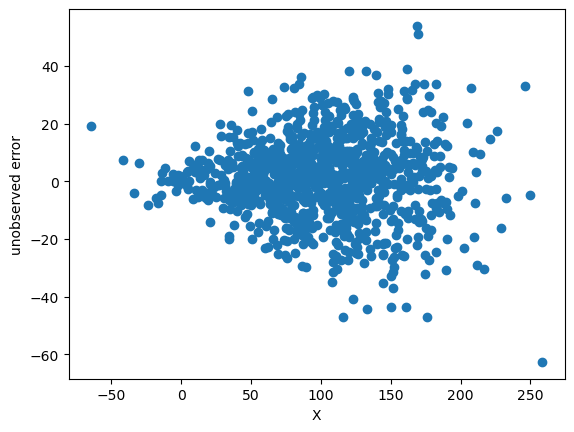

In [330]:
# Illustrate heteroskedasticity
import matplotlib.pyplot as plt

N = 1000
true_c = 1
true_d = 2
X = np.random.normal(size=N, loc=100, scale=50)
u = np.random.normal(size=N, loc=true_c, scale=np.sqrt(true_d*np.abs(X)))

_ = plt.scatter(X,u)
_ = plt.xlabel('X')
_ = plt.ylabel('unobserved error')

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

def bp_gdp(N, b0, true_c=0, true_d=0):
    '''
    Generate dataset for model with linear heteroskedasticity
    
    Takes as inputs sample size N and vector of true parameters (alpha and beta), b0
    
    Returns a tuple with numpy arrays y, X and Z, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    beta = b0[1]

    # Construct X
    X = np.random.normal(size=N, loc=100, scale=50)
    
    # Construct u
    if true_d == 0:
        u = np.random.normal(size=N, loc=true_c, scale=1)
    else:
        u = np.random.normal(size=N, loc=true_c, scale=np.sqrt(true_d*np.abs(X)))
    
    # Construct y
    y = alpha + X*beta + u
    
    # Construct df
    combined_dict = {'y':y, 'x':X, 'Constant':1}
    df = pd.DataFrame(combined_dict)
    
    return df['y'], df[['Constant','x']]

C:\Users\elean\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
def linear_regression(b,data):
    """
    Return matrix X.T*e (ell x N)
    """
    y,X=data
    e = y - X@b

    return (X.T*e).T

In [333]:
# generate data
N = 1000
alpha = 3
beta = 4
true_c = 1
true_d = 2
y,X = bp_gdp(N, [alpha, beta], true_c=true_c, true_d=true_d)

# create GMM estimator
est = GMM(linear_regression, (y,X), 2)

# run GMM estimator
b, fun = est.two_step_gmm()
print(b)

# get residuals
u_hat = y - X@b
u_hat2 = u_hat**2

# regress residuals
bp_est = GMM(linear_regression, (u_hat2,X), 2)
d, bp_fun = bp_est.two_step_gmm()
d

[3.2961958 4.0085438]


array([5.72519087, 1.99833697])

In [334]:
# Monte Carlo simulation

N = 1000 # Sample size
D = 1000 # Monte Carlo draws

# Structural parameters
alpha = 3
beta = 4
true_c = 1
true_d = 2

d_draws = pd.DataFrame(columns=['c', 'd'])
for i in range(D):
    y,X = bp_gdp(N, [alpha, beta], true_c=true_c, true_d=true_d)
    est = GMM(linear_regression, (y,X), 2)
    b, fun = est.two_step_gmm()
    u_hat2 = (y - X@b)**2
    bp_est = GMM(linear_regression, (u_hat2,X), 2)
    d, bp_fun = bp_est.two_step_gmm()
    d_df = pd.DataFrame(d, index=d_draws.columns).T
    d_draws = pd.concat([d_draws, d_df], ignore_index=True)

C:\Users\elean\AppData\Local\Temp\ipykernel_27376\3295730941.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  d_draws = pd.concat([d_draws, d_df], ignore_index=True)


Text(0, 0.5, 'Frequency')

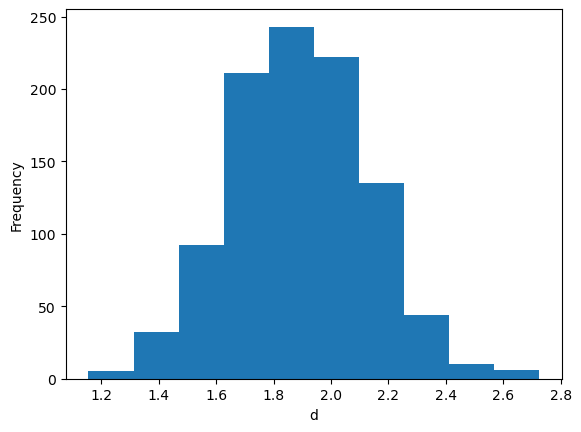

In [335]:
import matplotlib.pyplot as plt

plt.hist(d_draws['d'])
plt.xlabel('d')
plt.ylabel('Frequency')

In [336]:
from scipy.stats import t

d_avg = d_draws['d'].mean()
bias = d_avg - true_d
var = np.sum(np.square(d_draws['d'] - d_avg))
sd = np.sqrt(var)
se = sd/np.sqrt(len(d_draws))

print('Average estimate: ',d_avg)
print('Bias: ', bias)
print('Standard error (precision): ', se)

# Size of two-tailed t-test for d = 0
t_score = (d_avg - 0)/se
n = len(d_draws)
df = n - 1
pval = t.sf(np.abs(t_score), df) * 2
print('p-value: ', pval)

Average estimate:  1.8912832735978913
Bias:  -0.10871672640210872
Standard error (precision):  0.24109347347810853
p-value:  1.1119920306132353e-14


In [337]:
# Structural parameters;
true_c = 0.2
true_d = 0.5

N = 1000 # Sample size
D = 1000 # Monte Carlo draws

d_draws = pd.DataFrame(columns=['c', 'd'])
for i in range(D):
    est = GMM(linear_regression, bp_gdp(N, [alpha, beta], true_c=true_c, true_d=true_d), 2)
    b, fun = est.two_step_gmm()
    u_hat2 = (y - X@b)**2
    bp_est = GMM(linear_regression, (u_hat2,X), 2)
    d, bp_fun = bp_est.two_step_gmm()
    d_df = pd.DataFrame(d, index=d_draws.columns).T
    d_draws = pd.concat([d_draws, d_df], ignore_index=True)

C:\Users\elean\AppData\Local\Temp\ipykernel_27376\4027050908.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  d_draws = pd.concat([d_draws, d_df], ignore_index=True)


Text(0, 0.5, 'Frequency')

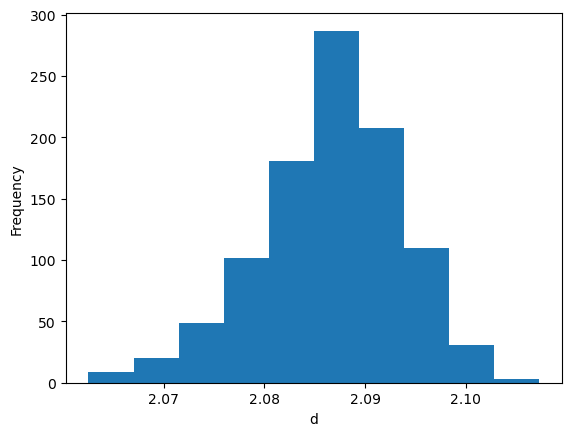

In [338]:
plt.hist(d_draws['d'])
plt.xlabel('d')
plt.ylabel('Frequency')

In [339]:
from scipy.stats import t

d_avg = d_draws['d'].mean()
bias = d_avg - true_d
var = np.sum(np.square(d_draws['d'] - d_avg))
sd = np.sqrt(var)
se = sd/np.sqrt(len(d_draws))

print('Average estimate: ',d_avg)
print('Bias: ', bias)
print('Standard error (precision): ', se)

# Size of two-tailed t-test for d = 0
t_score = (d_avg - 0)/se
n = len(d_draws)
df = n - 1
pval = t.sf(np.abs(t_score), df) * 2
print('p-value: ', pval)

Average estimate:  2.086593764772879
Bias:  1.586593764772879
Standard error (precision):  0.007054715070143129
p-value:  0.0


### (4) What can you say about the performance or relative merits of the Breusch-Pagan test versus your GMM alternative?

In this case, the Breusch-Pagan test is not able to detect heteroskedasticity, while the GMM alternative is. In addition, for larger values of $d$, the GMM alternative yields a reasonable estimate of $d$. The B-P test does not tell us anything about which variable is correlated with $u$, only that there is heteroskedasticity present.

However, the drawback of this GMM estimator is that we have assumed the form that heteroskedasticity takes, i.e., $\hat{u}^2 = c + dx + w$. If there was heteroskedasticity of a different form, then the GMM estimator's performance would probably be poor. The B-P test is more flexible because it can detect heteroskedasticity regardless of its form.

In [340]:
# c, d = 1, 2

import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

N = 1000
alpha = 3
beta = 4
true_c = 1
true_d = 2
y,X = bp_gdp(N, [alpha, beta], true_c=true_c, true_d=true_d)

df = X.copy()
df['y'] = y

# canned OLS regression
fit = smf.ols('y ~ x', data=df).fit()
print(fit.summary())

# canned Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.903e+05
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:07:46   Log-Likelihood:                -4102.7
No. Observations:                1000   AIC:                             8209.
Df Residuals:                     998   BIC:                             8219.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3355      1.015      3.286      0.0

[('Lagrange multiplier statistic', 87.3516483439728),
 ('p-value', 9.084439490330756e-21),
 ('f-value', 95.5208486259793),
 ('f p-value', 1.3141318131833772e-21)]

In [341]:
# c, d = 0.2, 0.5

true_c = 0.2
true_d = 0.5
y,X = bp_gdp(N, [alpha, beta], true_c=true_c, true_d=true_d)

df = X.copy()
df['y'] = y

# canned OLS regression
fit = smf.ols('y ~ x', data=df).fit()
print(fit.summary())

# canned Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.157e+05
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:07:46   Log-Likelihood:                -3353.3
No. Observations:                1000   AIC:                             6711.
Df Residuals:                     998   BIC:                             6721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9018      0.491      5.904      0.0

[('Lagrange multiplier statistic', 111.6168170319819),
 ('p-value', 4.334948746480342e-26),
 ('f-value', 125.38911759423543),
 ('f p-value', 1.684902121867555e-27)]

### (5) Suppose that in fact that $x$ is distributed uniformly over the interval $[0, 2\pi]$, and $\mathbb{E}(u^2|x) = \sigma^2(x) = \sigma^2 sin(2x)$, thus violating a.ii. What can you say about the performance of the Breusch-Pagan test in this circumstance? Can you modify your GMM test to provide a superior alternative?

***NOTE: $sin(2x)$ has negative values in the interval $[0, 2\pi]$. Assume that $\mathbb{E}(u^2|x) = \sigma^2(x) = \sigma^2 |sin(2x)|$***

Our original GMM estimator is no longer able to detect heteroskedasticity when it takes a sinusoidal form. If we use a 5% significance level, the *p*-value is greater than 0.05, so we are unable to reject the null hypothesis $H_0: d = 0$.

However, we can modify the GMM estimator to test for error that varies sinusoidally with $X$. After making this modification, the estimator is able to detect heteroskedasticity. In practice, though, this type of estimator is most useful when we have some theoretical basis for expecting heteroskedasticity of a particular form. If we do not know the form of heteroskedasticity, it is better to use the B-P test.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

def sin_gdp(N, b0, sigma2=1):
    '''
    Generate dataset for model with sinusoidal heteroskedasticity
    
    Takes as inputs sample size N and vector of true parameters (alpha and beta), b0
    
    Returns a tuple with numpy arrays y, X and Z, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    beta = b0[1]

    # Construct X
    X = np.random.uniform(size=N, low=0, high=2*np.pi)
    
    # Construct u
    u = np.random.normal(size=N, loc=0, scale=np.sqrt(sigma2*np.abs(np.sin(2*X))))
    
    # Construct y
    y = alpha + X*beta + u
    
    # Construct df
    combined_dict = {'y':y, 'x':X, 'Constant':1}
    df = pd.DataFrame(combined_dict)
    
    return df['y'], df[['Constant','x']]

C:\Users\elean\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [343]:
# Monte Carlo simulation
N = 1000 # Sample size
D = 1000 # Monte Carlo draws

# True parameters
alpha = 3
beta = 4
true_sigma2 = 2

d_draws_sin = pd.DataFrame(columns=['c', 'd'])
for i in range(D):
    y,X = sin_gdp(N, [alpha, beta], sigma2=true_sigma2)
    est = GMM(linear_regression, (y,X), 2)
    b, fun = est.two_step_gmm()
    u_hat2 = (y - X@b)**2
    bp_est = GMM(linear_regression, (u_hat2,X), 2)
    d, bp_fun = bp_est.two_step_gmm()
    d_df = pd.DataFrame(d, index=d_draws_sin.columns).T
    d_draws_sin = pd.concat([d_draws_sin, d_df], ignore_index=True)

C:\Users\elean\AppData\Local\Temp\ipykernel_27376\1263452945.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  d_draws_sin = pd.concat([d_draws_sin, d_df], ignore_index=True)


Text(0, 0.5, 'Frequency')

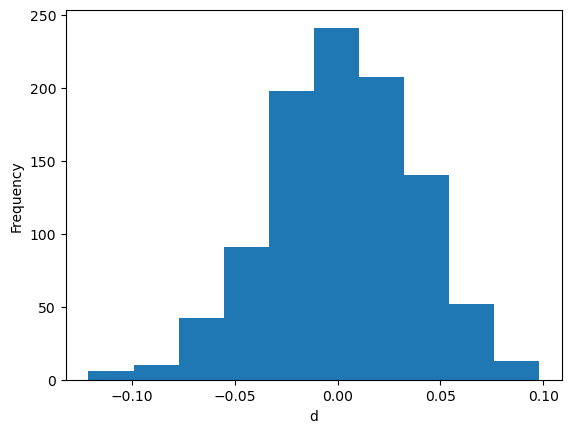

In [344]:
plt.hist(d_draws_sin['d'])
plt.xlabel('d')
plt.ylabel('Frequency')

In [345]:
from scipy.stats import t

d_avg = d_draws_sin['d'].mean()
var = np.sum(np.square(d_draws_sin['d'] - d_avg))
sd = np.sqrt(var)
se = sd/np.sqrt(len(d_draws_sin))

print('Average estimate: ',d_avg)
print('Standard error (precision): ', se)

# Size of two-tailed t-test for d = 0
t_score = (d_avg - 0)/se
n = len(d_draws_sin)
df = n - 1
pval = t.sf(np.abs(t_score), df) * 2
print('p-value: ', pval)

Average estimate:  0.002090164588833408
Standard error (precision):  0.03524100756531458
p-value:  0.9527165964244743


Alternatively, we can modify the GMM estimator applied to the auxiliary regression so that it has a sinusoidal functional form.

In [346]:
def g_j_sin(b,data):
    """
    Return matrix u^2 - sigma2*sin(2x)
    
    sigma2 represents sigma^2
    """
    sigma2 = b[0]
    u2,X=data
    
    u2_df = pd.DataFrame(u2, columns=['x'])

    return u2_df - sigma2*np.abs(np.sin(2*X[['x']]))

In [347]:
# Monte Carlo simulation
N = 1000 # Sample size
D = 1000 # Monte Carlo draws

# True parameters
alpha = 3
beta = 4
true_sigma2 = 2

sigma2_draws = pd.DataFrame(columns=['sigma2'])
for i in range(D):
    y,X = sin_gdp(N, [alpha, beta], sigma2=true_sigma2)
    est = GMM(linear_regression, (y,X), 2)
    b, fun = est.two_step_gmm()
    u_hat2 = (y - X@b)**2
    bp_est = GMM(g_j_sin, (u_hat2,X), 1)
    sigma2, bp_fun = bp_est.two_step_gmm()
    sigma2_df = pd.DataFrame(sigma2, index=sigma2_draws.columns).T
    sigma2_draws = pd.concat([sigma2_draws, sigma2_df], ignore_index=True)

C:\Users\elean\AppData\Local\Temp\ipykernel_27376\1808578301.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sigma2_draws = pd.concat([sigma2_draws, sigma2_df], ignore_index=True)


Text(0, 0.5, 'Frequency')

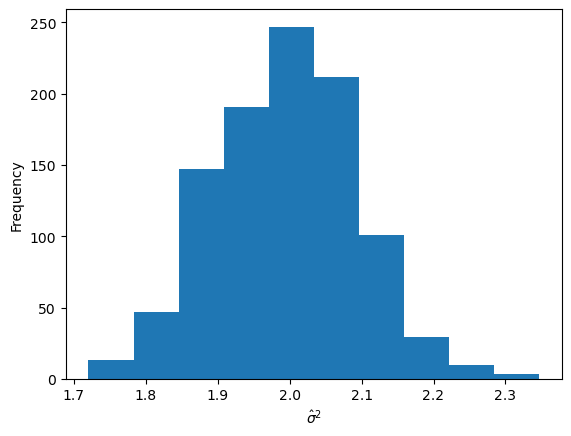

In [348]:
plt.hist(sigma2_draws['sigma2'])
plt.xlabel('$\hat{\sigma}^2$')
plt.ylabel('Frequency')

In [349]:
from scipy.stats import t

sigma2_avg = sigma2_draws['sigma2'].mean()
var = np.sum(np.square(sigma2_draws['sigma2'] - sigma2_avg))
sd = np.sqrt(var)
se = sd/np.sqrt(len(sigma2_draws))

print('Average estimate: ',sigma2_avg)
print('Standard error (precision): ', se)

# Size of two-tailed t-test for sigma^2 = 0
t_score = (sigma2_avg - 0)/se
n = len(sigma2_draws)
df = n - 1
pval = t.sf(np.abs(t_score), df) * 2
print('p-value: ', pval)

Average estimate:  1.994537531164865
Standard error (precision):  0.09712492859748821
p-value:  1.861724677205324e-78


### (6) In the above, we’ve considered a test of a specific functional form for the variance of $u$. Suppose instead that we don’t have any prior information regarding the form of $\mathbb{E}(u^2|x) = f(x)$. Discuss how you might go about constructing an extended version of the Breusch-Pagan test which tests for $f(x)$ non-constant.

We can adapt GMM to simulate feasible generalized least squares, which can handle many different forms of heteroskedasticity.

Specifically, we can use this form of heteroskedasticity, which can be used to fit many forms of heteroskedasticity:

$\sigma_i^2 = e^{\alpha_0 + \alpha_1 Z_{1,i} + ... + \alpha_m Z_{m,i} }$

which can be rewritten as

$log(\hat{\epsilon}_i^2) = \alpha_0 + \alpha_1 Z_{1,i} + ... + \alpha_m Z_{m,i} + log \left( \frac{\hat{\epsilon}_i^2}{\sigma_i^2} \right)$

where $\hat{\epsilon}_i^2$ is the OLS residuals from the first regression, $y = X \beta + \epsilon$

*Alternative idea, more related to GLS*: https://web.vu.lt/mif/a.buteikis/wp-content/uploads/2019/11/MultivariableRegression_4.pdf

### (7) Show that you can use your ideas about estimating $f(x)$ to construct a more efficient estimator of $\beta$ if $f(x)$ isn’t constant. Relate your estimator to the optimal generalized least squares (GLS) estimator.

This estimator is less efficient than the optimal GLS estimator but its advantage is that it works with many different forms of heteroskedasticity.

In [35]:
# Structural parameters
N = 1000
alpha = 3
beta = 4
true_c = 1
true_d = 2

D = 1000 # Monte Carlo draws
b_draws = pd.DataFrame(columns=['a', 'b'])
d_draws = pd.DataFrame(columns=['c', 'd'])
for i in range(D):
    y,X = bp_gdp(N, [alpha, beta], true_c=true_c, true_d=true_d)
    est = GMM(linear_regression, (y,X), 2)
    b0, fun0 = est.two_step_gmm()
    log_e2 = np.log((y - X@b0)**2)
    bp_est = GMM(linear_regression, (log_e2,X), 2)
    d, bp_fun = bp_est.two_step_gmm()
    d_df = pd.DataFrame(d, index=d_draws.columns).T
    d_draws = pd.concat([d_draws, d_df], ignore_index=True)
    log_e2_fit = X@d
    h_fit = np.exp(log_e2_fit)
    bp_est2 = GMM(linear_regression, (y/np.sqrt(h_fit), (X.T/np.sqrt(h_fit)).T), 2)
    b, fun = bp_est2.two_step_gmm()
    b_df = pd.DataFrame(b, index=b_draws.columns).T
    b_draws = pd.concat([b_draws, b_df], ignore_index=True)

C:\Users\elean\AppData\Local\Temp\ipykernel_15892\977415252.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  d_draws = pd.concat([d_draws, d_df], ignore_index=True)
C:\Users\elean\AppData\Local\Temp\ipykernel_15892\977415252.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b_draws = pd.concat([b_draws, b_df], ignore_index=True)


Text(0, 0.5, 'Frequency')

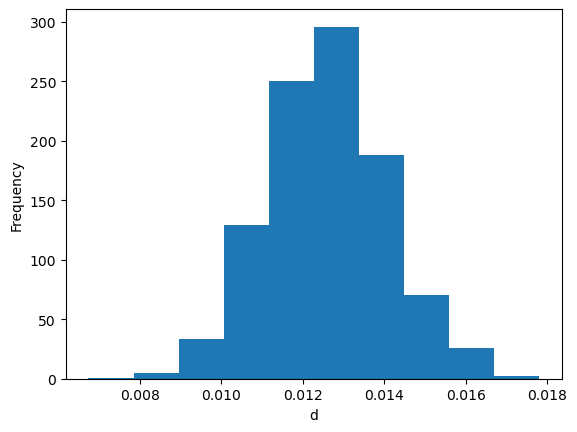

In [36]:
import matplotlib.pyplot as plt

plt.hist(d_draws['d'])
plt.xlabel('d')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

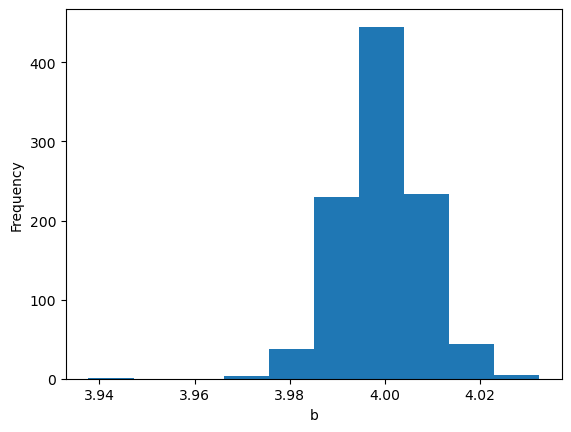

In [37]:
import matplotlib.pyplot as plt

plt.hist(b_draws['b'])
plt.xlabel('b')
plt.ylabel('Frequency')

In [39]:
def quad_gdp(N, b0, true_c=0, true_d=0):
    '''
    Generate dataset for model with quadratic heteroskedasticity
    
    Takes as inputs sample size N and vector of true parameters (alpha and beta), b0
    
    Returns a tuple with numpy arrays y, X and Z, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    beta = b0[1]

    # Construct X
    X = np.random.normal(size=N, loc=100, scale=50)
    
    # Construct u
    if true_d == 0:
        u = np.random.normal(size=N, loc=true_c, scale=1)
    else:
        u = np.random.normal(size=N, loc=true_c, scale=np.sqrt(true_d*X**2))
    
    # Construct y
    y = alpha + X*beta + u
    
    # Construct df
    combined_dict = {'y':y, 'x':X, 'Constant':1}
    df = pd.DataFrame(combined_dict)
    
    return df['y'], df[['Constant','x']]

In [40]:
# Structural parameters
N = 1000
alpha = 3
beta = 4
true_c = 1
true_d = 2

# Generalized least squares method
D = 1000 # Monte Carlo draws
b_draws = pd.DataFrame(columns=['a', 'b'])
d_draws = pd.DataFrame(columns=['c', 'd'])
for i in range(D):
    y,X = quad_gdp(N, [alpha, beta], true_c=true_c, true_d=true_d)
    est = GMM(linear_regression, (y,X), 2)
    b0, fun0 = est.two_step_gmm()
    log_e2 = np.log((y - X@b0)**2)
    bp_est = GMM(linear_regression, (log_e2,X), 2)
    d, bp_fun = bp_est.two_step_gmm()
    d_df = pd.DataFrame(d, index=d_draws.columns).T
    d_draws = pd.concat([d_draws, d_df], ignore_index=True)
    log_e2_fit = X@d
    h_fit = np.exp(log_e2_fit)
    bp_est2 = GMM(linear_regression, (y/np.sqrt(h_fit), (X.T/np.sqrt(h_fit)).T), 2)
    b, fun = bp_est2.two_step_gmm()
    b_df = pd.DataFrame(b, index=b_draws.columns).T
    b_draws = pd.concat([b_draws, b_df], ignore_index=True)

C:\Users\elean\AppData\Local\Temp\ipykernel_15892\1700492155.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  d_draws = pd.concat([d_draws, d_df], ignore_index=True)
C:\Users\elean\AppData\Local\Temp\ipykernel_15892\1700492155.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  b_draws = pd.concat([b_draws, b_df], ignore_index=True)


Text(0, 0.5, 'Frequency')

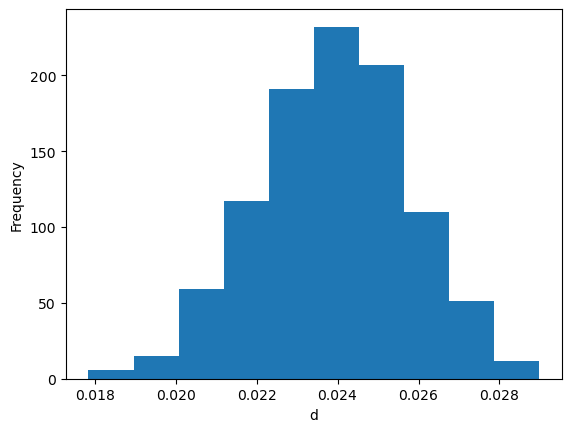

In [41]:
import matplotlib.pyplot as plt

plt.hist(d_draws['d'])
plt.xlabel('d')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

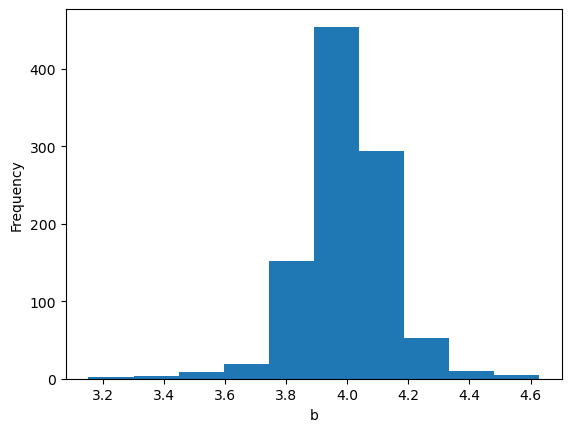

In [42]:
import matplotlib.pyplot as plt

plt.hist(b_draws['b'])
plt.xlabel('b')
plt.ylabel('Frequency')